In [14]:
#Задание 1. Выбран и загружен https://www.kaggle.com/datasets/rajyellow46/wine-quality/data датасет с помощью библиотеки Pandas.
#Реализован код, вносящий случайные искажения в данные.

In [15]:
# Нужные импорты библиотек 
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
#Загрузка датасета и проверка загрузки 
data = pd.read_csv("data/winequalityN.csv")

print(data.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [17]:
#Просмотр информации о датасете
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [18]:
#Проверка пропусков 
print(data.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [19]:
#Проверка статистики
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [21]:
#Заметим, что уже присутсвуют пропуски в датасете 

#Шум
for col in data.columns[1:-1]:
    shum = np.random.normal(0, 0.1, size=data[col].shape)
    data[col] = data[col] + shum

#Выбросы
for col in data.columns[1:-1]:
    data.loc[random.sample(range(data.shape[0]), k=5), col] *= 10

# Проверка изменений
print(data.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white       6.912569          0.071511     0.131941       20.730748   
1  white       6.277703          0.430335     0.292809        1.519514   
2  white       8.397381          0.275263     0.574525        7.024525   
3  white       7.512672          0.603195     0.495789        8.650330   
4  white       7.062567          0.232017     0.456063        8.516677   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.057672            44.904284            170.009578  1.093046  2.918459   
1  -0.091228            14.268770            132.071209  0.967474  3.234479   
2   0.080884            30.048546             96.942430  1.029912  3.194079   
3   0.117507            47.090682            186.042129  0.991994  3.210323   
4  -0.136101            46.696128            185.795621  1.044904  3.237354   

   sulphates   alcohol  quality  
0   0.424949  8.718635        6  
1   0.254598

In [ ]:
#Задание 2.С помощью библиотеки Pandas произвести предварительный анализ датасета на наличие пропусков и искажений. Произвести исправление данных, используя 3 различные стратегии.

In [22]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.415981          0.344822     0.323534        5.508806   
std         9.828170          0.255013     0.267801        5.127419   
min         3.899332         -0.315949    -0.413880        0.456062   
25%         6.404722          0.192966     0.185657        1.817355   
50%         6.980412          0.315204     0.315995        3.046117   
75%         7.697796          0.461942     0.449039        8.133504   
max       767.707996          8.080830     9.160639      100.066453   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.060217            30.997520            117.644369     1.008482   
std       0.151976            22.529057             77.614798     0.365557   
min      -1.630570             0.818997         

In [24]:
#Исправление пропусков в датасете

#Определим категориальные и численные столбцы
categorical = ['type']
num = [col for col in data.columns if col not in categorical]

#Стратегия 1: Заполнение средним арифметическим для числовых данных
data_filled_mean = data.copy()
data_filled_mean[num] = data[num].fillna(data[num].mean())

#Стратегия 2: Заполнение медианой для числовых данных
data_filled_median = data.copy()
data_filled_median[num] = data[num].fillna(data[num].median())

#Стратегия 3: Заполнение случайным значением из того же столбца для категориальных данных
def fill_random_value(series):
    non_null_values = series.dropna()
    return series.apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)

data_filled_random = data.copy()
for col in categorical:
    data_filled_random[col] = fill_random_value(data[col])

In [25]:
#Удаление дупликаты 
data = data.drop_duplicates()

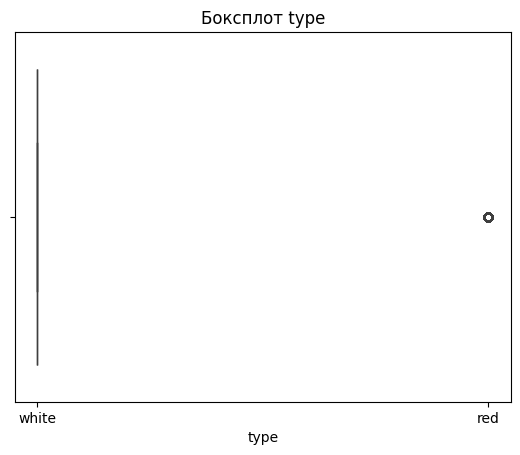

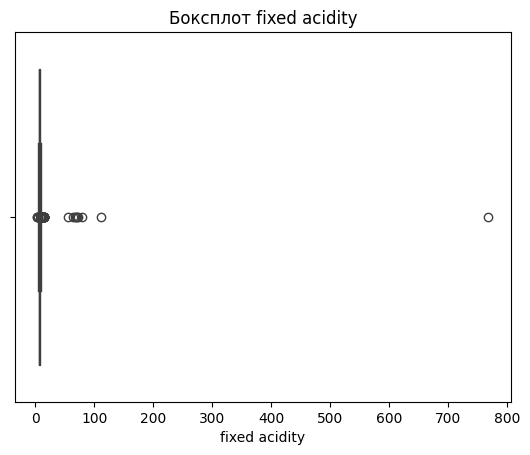

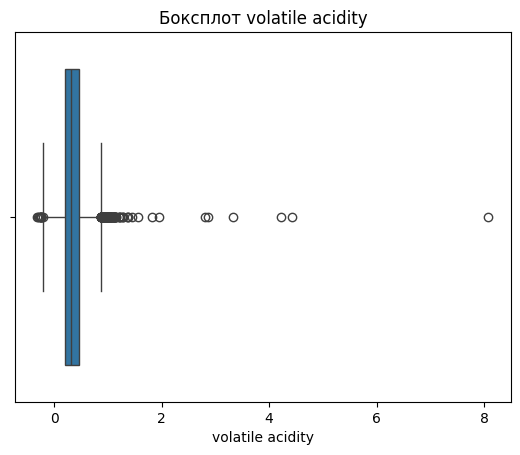

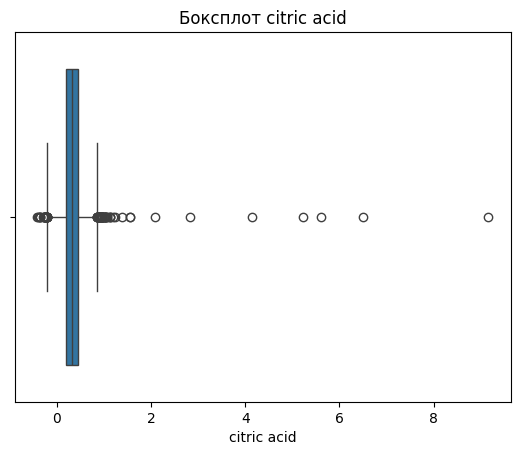

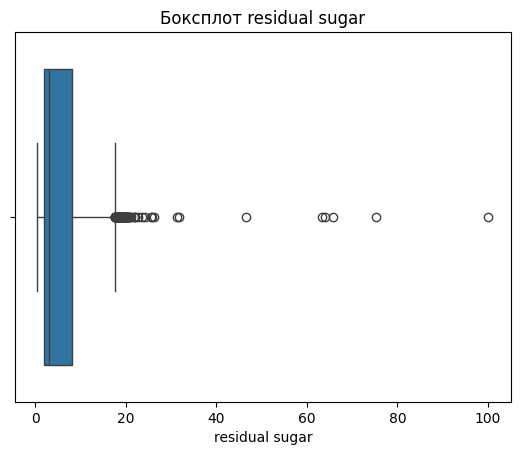

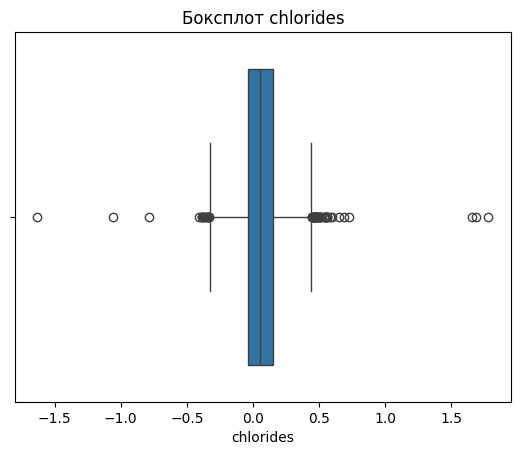

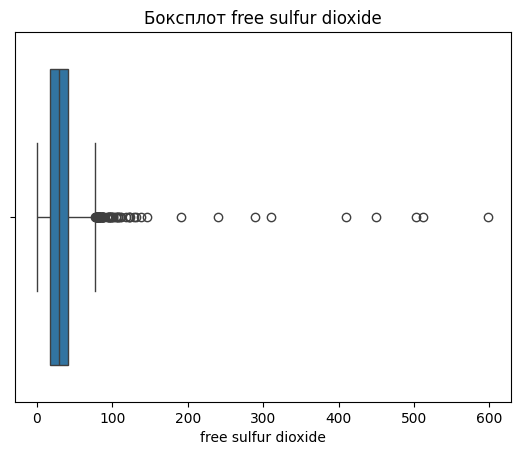

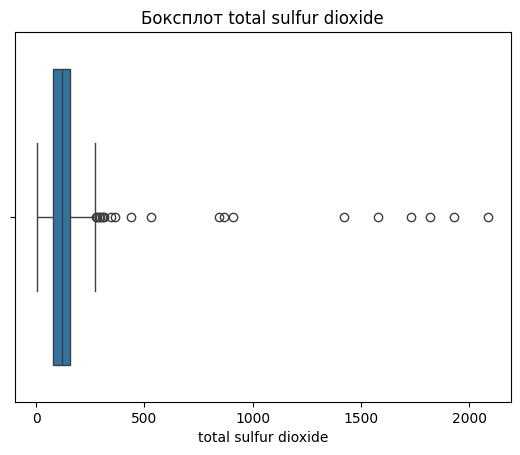

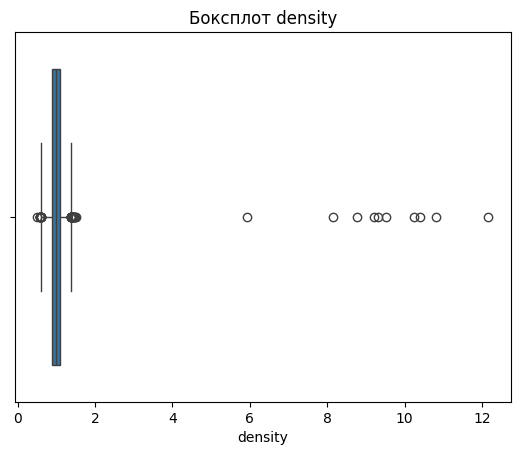

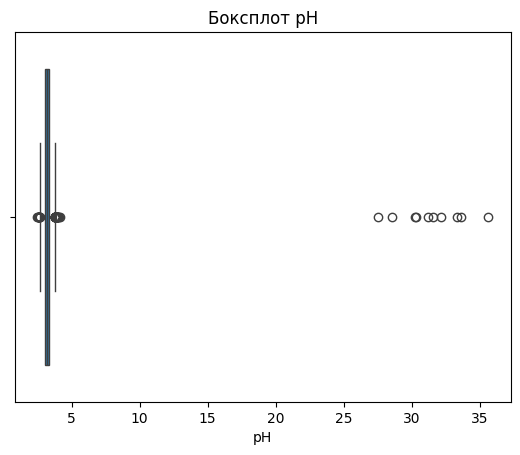

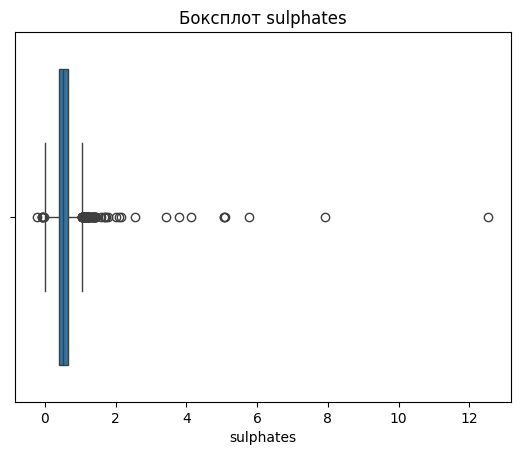

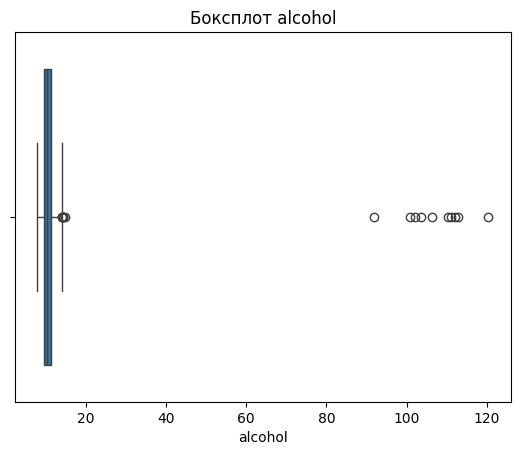

In [26]:
#Боксплоты на выбросы
for col in data.columns[:-1]:
    sns.boxplot(x=data[col])
    plt.title(f"Боксплот {col}")
    plt.show()

In [27]:
#Удаление строк с выбросом. Метрика - z-оценка (отклонение больше 3*(стандартное отклонение))
numerical = data.columns[1:]

#Вычисление Z-оценки
for col in numerical:
    mean = data[col].mean() #срзнач по столбцу
    std = data[col].std() #станд.откл по столбцу
    #Рассчитывание Z-оценки
    z = (data[col]-mean)/std
    #Удаляем строки где abs(z) > 3
    data = data[z.abs() <= 3]

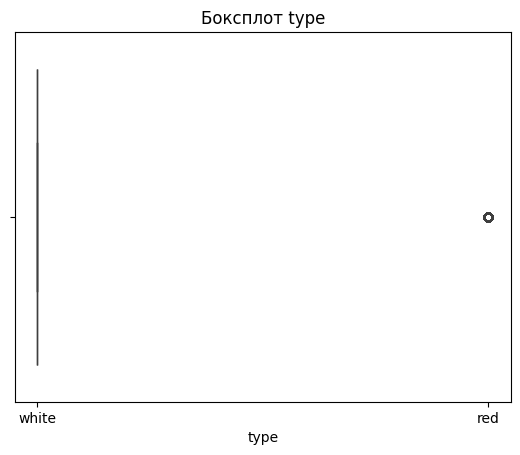

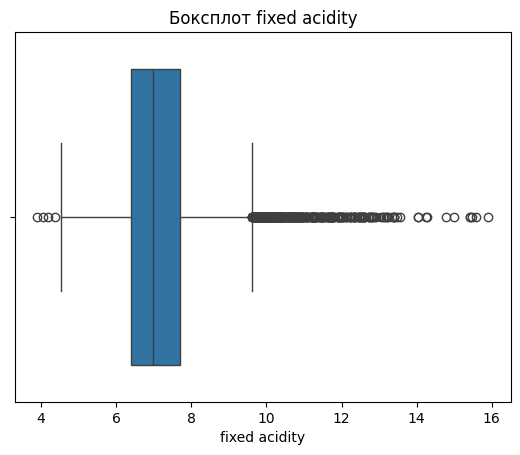

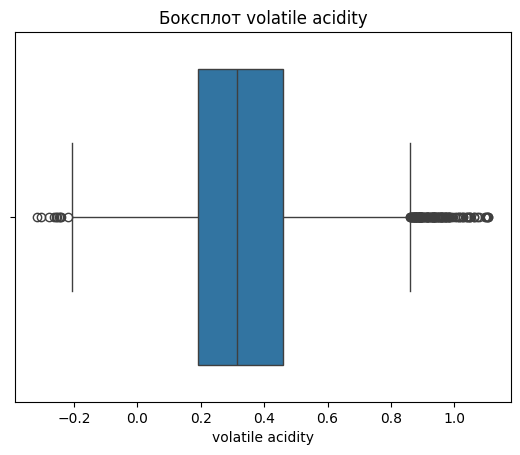

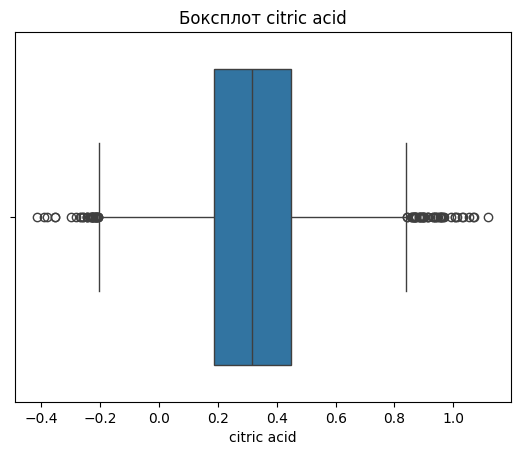

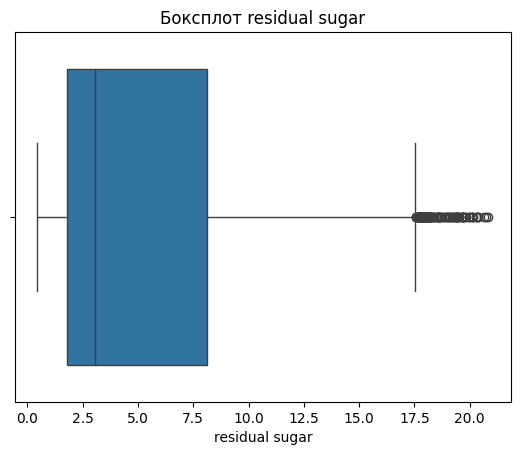

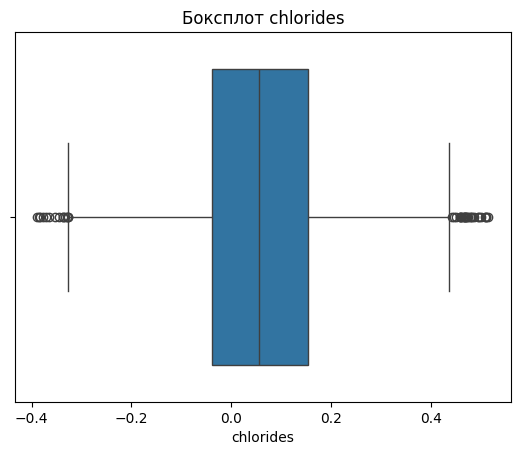

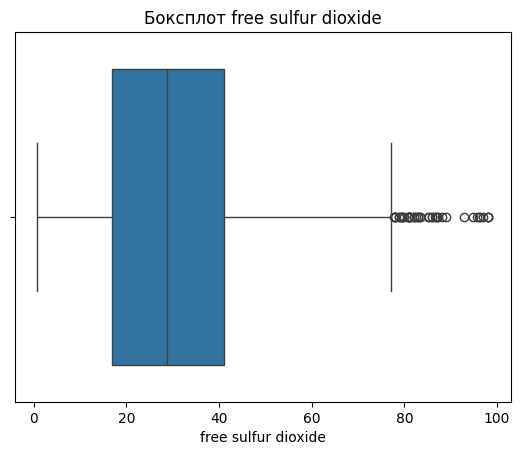

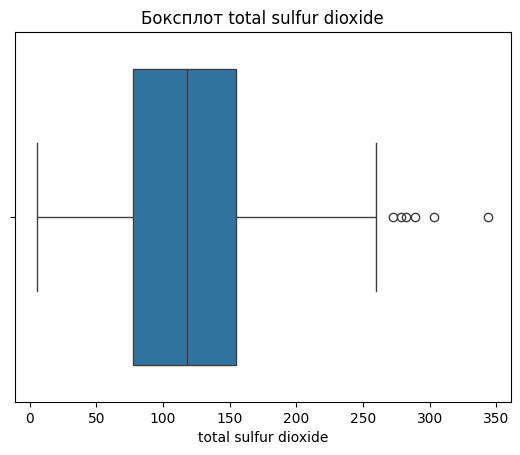

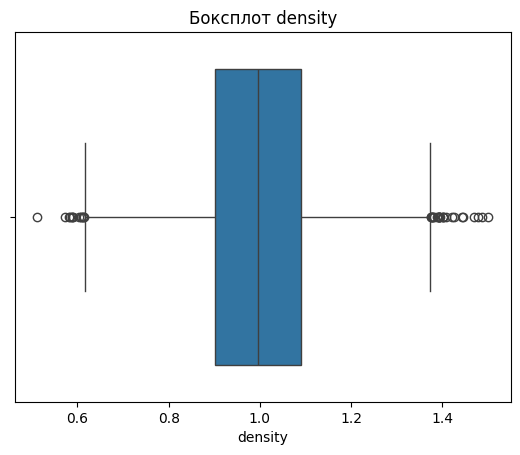

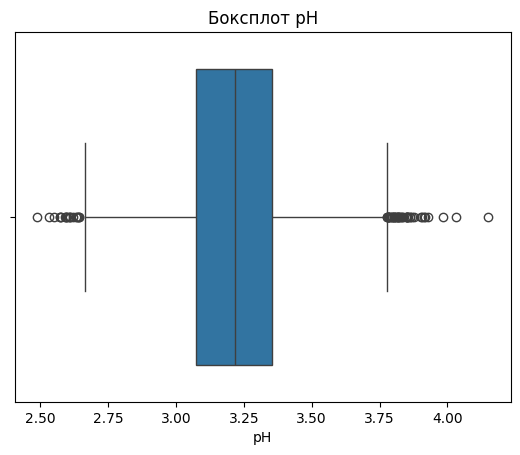

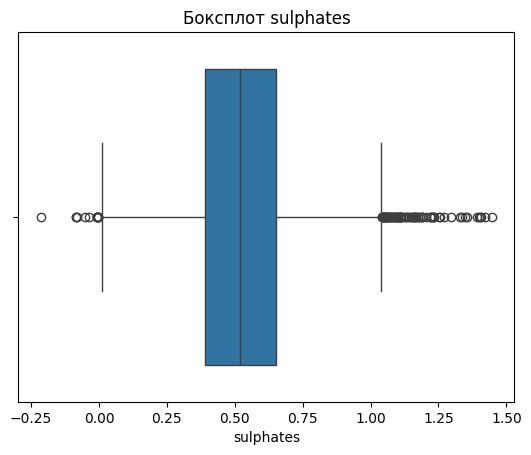

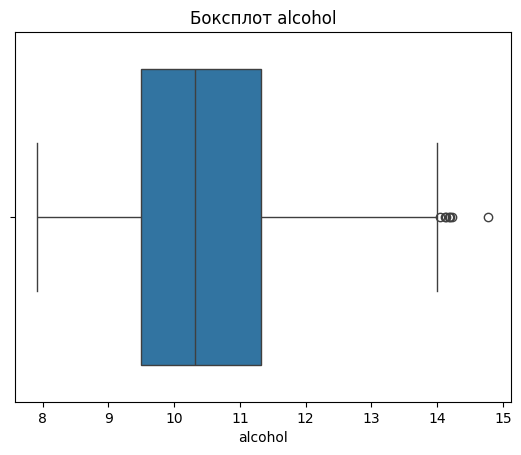

In [28]:
#Боксплоты 
for col in data.columns[:-1]:
    sns.boxplot(x=data[col])
    plt.title(f"Боксплот {col}")
    plt.show()

In [29]:
#Статистика данных после
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6268.000000       6268.000000  6268.000000     6268.000000   
mean        7.211722          0.337682     0.317487        5.420302   
std         1.300026          0.210936     0.202068        4.653621   
min         3.899332         -0.315949    -0.413880        0.456062   
25%         6.404038          0.191882     0.186052        1.806004   
50%         6.977376          0.314457     0.315995        3.045636   
75%         7.688756          0.459533     0.447662        8.102163   
max        15.910721          1.107599     1.119057       20.837606   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6268.000000          6268.000000           6268.000000  6268.000000   
mean      0.059203            30.300098            115.526180     0.995410   
std       0.143436            16.915949             55.966553     0.141308   
min      -0.388498             0.818997              5.855840     0.512378   
25%      -0.038320            16.949286             77.756929     0.901167   
50%       0.056444            28.885060            118.015031     0.996018   
75%       0.153859            41.084792            155.124291     1.090405   
max       0.515551            98.125696            343.973129     1.500675   

                pH    sulphates      alcohol      quality  
count  6268.000000  6268.000000  6268.000000  6268.000000  
mean      3.218221     0.526151    10.495695     5.831366  
std       0.214086     0.199443     1.201026     0.847636  
min       2.490092    -0.213848     7.920085     4.000000  
25%       3.074524     0.389535     9.493004     5.000000  
50%       3.217100     0.517555    10.315873     6.000000  
75%       3.355312     0.650684    11.313282     6.000000  
max       4.150359     1.446510    14.776257     8.000000

In [30]:
data['type'].value_counts()

type
white    4736
red      1532
Name: count, dtype: int64

In [31]:
#Распределение целевой переменной
data['quality'].value_counts()

quality
6    2754
5    2072
7    1053
4     204
8     185
Name: count, dtype: int64

In [32]:
#Задание 3. Зависимость признаков по графикам

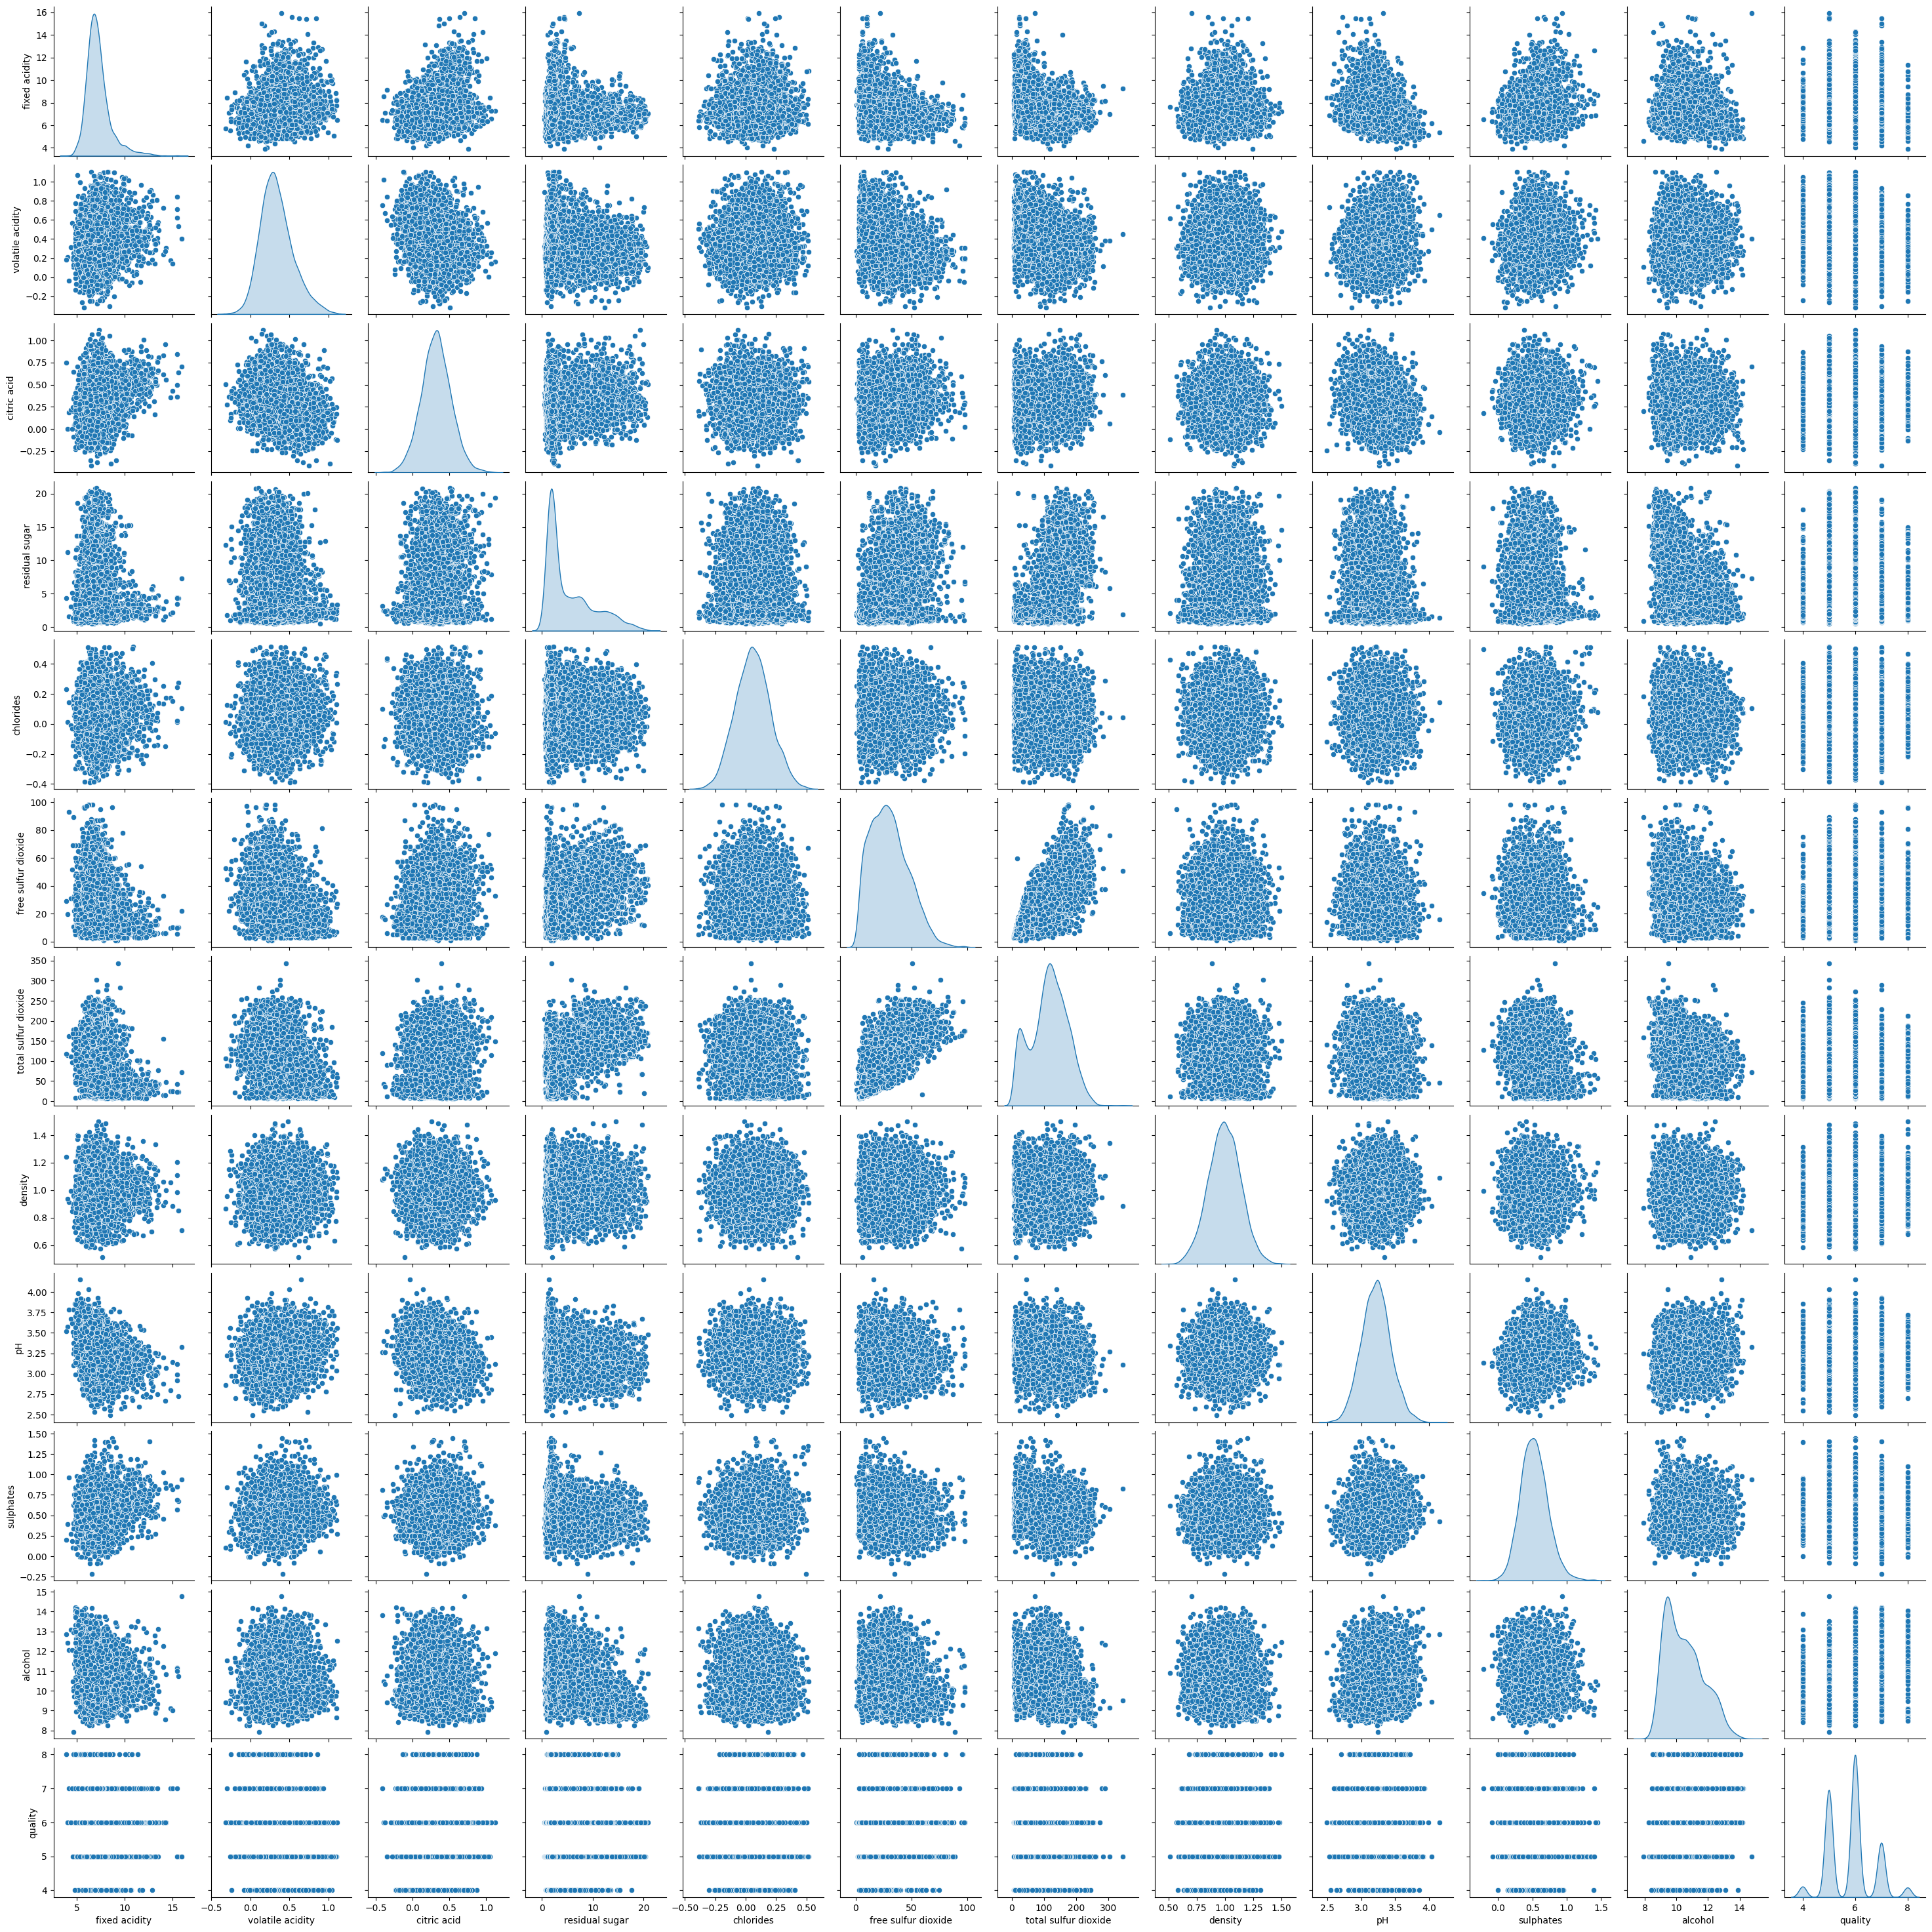

In [34]:
sns.pairplot(data, diag_kind= 'kde')
plt.show()

In [35]:
#Выводы о зависимости данных
#1.Распределение данных (графики на диагонали):
#Большинство переменных имеет распределение, близкое к нормальному, 
#хотя в некоторых случаях наблюдаются мультипиковость и асимметрия. 
#Объем данных для вин с качеством 4 и 8 невелик, что может ограничить точность 
#предсказаний моделей для этих категорий.

#2. Связи между признаками:

#Между некоторыми признаками наблюдаются возможные зависимости, например:
#Fixed acidity и critic acid.
#Total sulfur dioxide и free sulfur dioxide.
#Total sulfur dioxide и residual sugar.
#Total sulfur dioxide/free sulfur dioxide и fixed acidity.
#Лучшие вина, как правило, характеризуются более низкими значениями fixed/volatile acidity, chlorides, free/total sulfur dioxide, pH и sulphates, 
#а также более высоким содержанием алкоголя (alcohol).
#3.Выбросы в данных:
#Существенных выбросов в данных не обнаружено.

In [36]:
#Задание 4. Кодирование категориальных признаков

In [37]:
# Кодирование категориального признака (type) с помощью One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_type = encoder.fit_transform(data[['type']])
type_columns = encoder.get_feature_names_out(['type']) # Названия новых закодированных столбцов

# Создаём DataFrame для закодированных данных
encoded_type_df = pd.DataFrame(encoded_type, columns=type_columns, index=data.index)

# Убираем оригинальный категориальный столбец и добавляем закодированные
data = pd.concat([data.drop(columns=['type']), encoded_type_df], axis=1)

# Стандартизация признаков
scaler = StandardScaler()
features = data.drop('quality', axis=1) # Признаки
target = data['quality'] # Целевой столбец
scaled_features = scaler.fit_transform(features) # Стандартизированные признаки

In [38]:
#Задание 5. Задача классификации

In [39]:
# Делим данные на обучающий и тестовый наборы (тестовые данные - 30%)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

Логистическая регрессия - Оценка тренировочных данных: 0.5423, Оценка тестовых данных: 0.5152


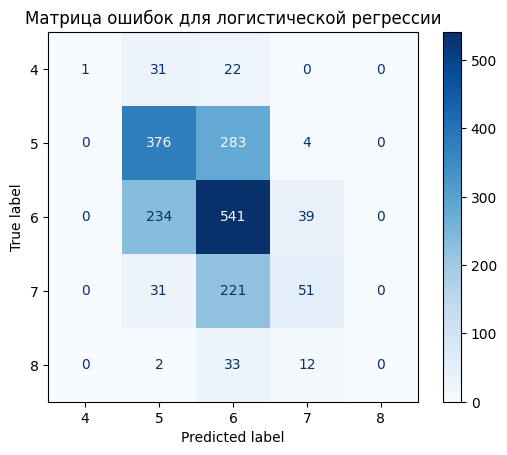



Метод опорных векторов - Оценка тренировочных данных: 0.5968, Оценка тестовых данных: 0.5183


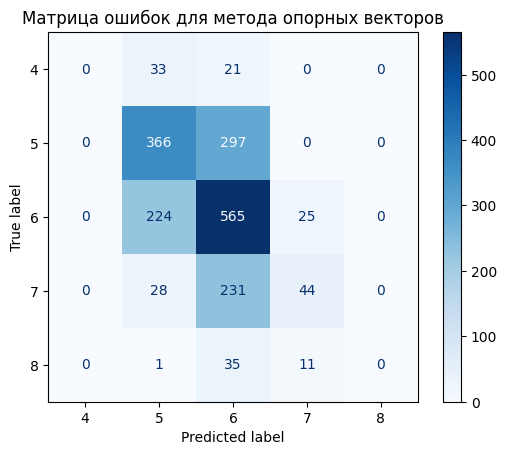



Случайный лес - Оценка тренировочных данных: 1.0000, Оценка тестовых данных: 0.5417


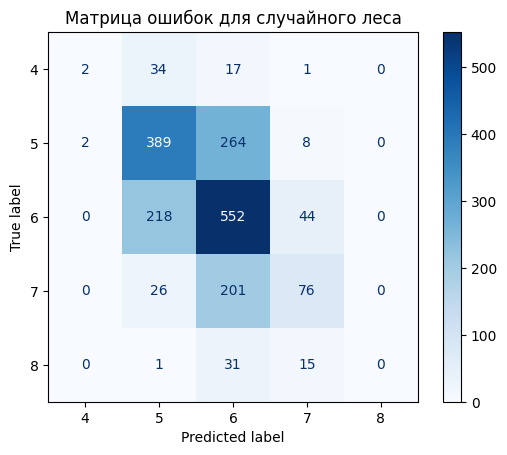

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
train_score_log_reg = log_reg.score(X_train, y_train)
test_score_log_reg = log_reg.score(X_test, y_test)

# Матрица ошибок
y_pred = log_reg.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred, labels=[4, 5, 6, 7, 8])


# Метод опорных векторов
svc = SVC()
svc.fit(X_train, y_train)
train_score_svc = svc.score(X_train, y_train)
test_score_svc = svc.score(X_test, y_test)
y_pred = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred, labels=[4, 5, 6, 7, 8])


# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred, labels=[4, 5, 6, 7, 8])

# Результаты
print(f'Логистическая регрессия - Оценка тренировочных данных: {train_score_log_reg:.4f}, Оценка тестовых данных: {test_score_log_reg:.4f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=[4, 5, 6, 7, 8])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок для логистической регрессии")
plt.show()

print(f'\n\nМетод опорных векторов - Оценка тренировочных данных: {train_score_svc:.4f}, Оценка тестовых данных: {test_score_svc:.4f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=[4, 5, 6, 7, 8])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок для метода опорных векторов")
plt.show()

print(f'\n\nСлучайный лес - Оценка тренировочных данных: {train_score_rf:.4f}, Оценка тестовых данных: {test_score_rf:.4f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[4, 5, 6, 7, 8])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок для случайного леса")
plt.show()


In [41]:
### Вывод

##Результаты всех трех моделей оказались схожими:  
##- Точность логистической регрессии на тестовых данных составила около 53%.  
##- Метод опорных векторов показал точность 54.5%.  
##- Случайный лес оказался самым точным с результатом 57%.  

##Однако стоит обратить внимание, что случайный лес достиг 100% точности на тренировочных данных, 
##что может указывать на переобучение. Модель слишком сильно адаптировалась к обучающей выборке, что, несмотря на высокую точность, 
##снижает её обобщающую способность. В целом, точность моделей невысока — правильный ответ даётся примерно в половине случаев.

##Для анализа причин низкой точности были построены матрицы ошибок. Из них видно, что модели практически не способны корректно классифицировать 
##вина с качеством 4 и 8. Это связано с тем, что таких наблюдений в датасете мало по сравнению с качеством 5, 6 и 7. 
##Очевидно, что недостаточное количество данных о винах с качеством 4 и 8 ограничивает способность моделей делать точные прогнозы для этих категорий.

##С другой стороны, вина с качеством 5, 6 и 7 определяются достаточно точно. Ошибки моделей в основном ограничиваются 
##соседними категориями (например, 5 классифицируется как 6, а 7 — как 6). 
##Более того, вина с качеством 6 предсказываются лучше всего, что связано с их преобладанием в датасете.

##В итоге все три модели демонстрируют приемлемые результаты для данной задачи классификации. 
##У них есть потенциал для улучшения точности, если обучать их на более крупном и сбалансированном датасете, где категории качества распределены равномерно.

In [42]:
#Задание 6. Понижение размерности

In [43]:
# L1-регуляризация

# Модель Lasso с l1-регуляризацией
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Отбираем признаки
lasso_selected_features = features.columns[(lasso.coef_ != 0)]
print(f"Выбранные признаки (L1-регуляризация): {lasso_selected_features}")

Выбранные признаки (L1-регуляризация): Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


In [44]:
# Последовательный отбор признаков

sfs = SequentialFeatureSelector(LogisticRegression())
sfs.fit(X_train, y_train)

sfs_selected_features = features.columns[sfs.get_support()]
print(f"Выбранные признаки (последовательный отбор признаков): {sfs_selected_features}")

Выбранные признаки (последовательный отбор признаков): Index(['volatile acidity', 'residual sugar', 'chlorides', 'density', 'pH',
       'alcohol'],
      dtype='object')


In [45]:
# Дерво решений

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Важности признаков
dt_feature_importance = dt.feature_importances_

# Отбор признаков с важностью > 0.075 (например)
dt_selected_features = features.columns[dt_feature_importance > 0.075]
print(f"Выбранные признаки (дерево решений): {dt_selected_features}")

Выбранные признаки (дерево решений): Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')


In [46]:
# Проверка способов понижений размерности на логистической регрессии

# Создаём новый набор данных с выбранными признаками L1-регуляризацией
X_train_selected = pd.DataFrame(X_train, columns=data.columns[:-1])[lasso_selected_features]
X_test_selected = pd.DataFrame(X_test, columns=data.columns[:-1])[lasso_selected_features]

# Логистическая регрессия (L1-регуляризация)
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred_log_reg_test = log_reg.predict(X_test_selected)
log_reg_score_test = accuracy_score(y_test, y_pred_log_reg_test)
y_pred_log_reg_train = log_reg.predict(X_train_selected)
log_reg_score_train = accuracy_score(y_train, y_pred_log_reg_train)
print(f"Логистическая регрессия — L1-регуляризация: тестовые - {log_reg_score_test}, обучающие - {log_reg_score_train}")


# Создаём новый набор данных с выбранными признаками последовательным отбором
X_train_selected = pd.DataFrame(X_train, columns=data.columns[:-1])[sfs_selected_features]
X_test_selected = pd.DataFrame(X_test, columns=data.columns[:-1])[sfs_selected_features]

# Логистическая регрессия (последовательный отбор признаков)
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred_log_reg_test = log_reg.predict(X_test_selected)
log_reg_score_test = accuracy_score(y_test, y_pred_log_reg_test)
y_pred_log_reg_train = log_reg.predict(X_train_selected)
log_reg_score_train = accuracy_score(y_train, y_pred_log_reg_train)
print(f"Логистическая регрессия — последовательный отбор признаков: тестовые - {log_reg_score_test}, обучающие - {log_reg_score_train}")


# Создаём новый набор данных с выбранными признаками деревом решений
X_train_selected = pd.DataFrame(X_train, columns=data.columns[:-1])[dt_selected_features]
X_test_selected = pd.DataFrame(X_test, columns=data.columns[:-1])[dt_selected_features]

# Логистическая регрессия (дерево решений)
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred_log_reg_test = log_reg.predict(X_test_selected)
log_reg_score_test = accuracy_score(y_test, y_pred_log_reg_test)
y_pred_log_reg_train = log_reg.predict(X_train_selected)
log_reg_score_train = accuracy_score(y_train, y_pred_log_reg_train)
print(f"Логистическая регрессия — дерево решений: тестовые - {log_reg_score_test}, обучающие - {log_reg_score_train}")

Логистическая регрессия — L1-регуляризация: тестовые - 0.5151515151515151, обучающие - 0.5386368816959197
Логистическая регрессия — последовательный отбор признаков: тестовые - 0.5103668261562998, обучающие - 0.5363574196489629
Логистическая регрессия — дерево решений: тестовые - 0.5124933545986178, обучающие - 0.5381809892865284


In [ ]:
##Вывод
##После применения трех методов понижения размерности данных и обучения модели логистической регрессии на отобранных признаках, 
##точность модели немного увеличилась. Это, вероятно, связано с недостатками исходного датасета для данной задачи классификации. 
##Наибольшего улучшения удалось добиться при понижении размерности с помощью L1-регуляризации. 
##Последовательный отбор показал наименьшее количество выбранных признаков — 6, и точность модели на этих данных оказалась чуть ниже, 
##чем при L1-регуляризации. Наименее эффективным методом оказалось использование дерева решений для понижения размерности.

##В целом, все методы показали свою полезность, так как они позволяют избавиться от лишних признаков, упрощая процесс обучения, 
##повышая его эффективность и, в некоторых случаях, точность модели.